# Überschrift

🔍 Überblick:
(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std   

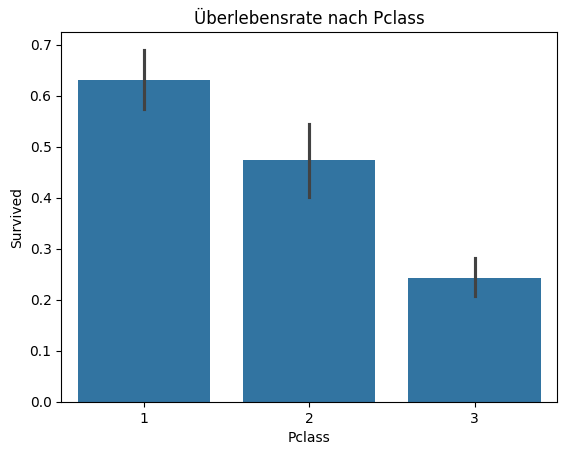


📊 Überlebensrate nach Sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


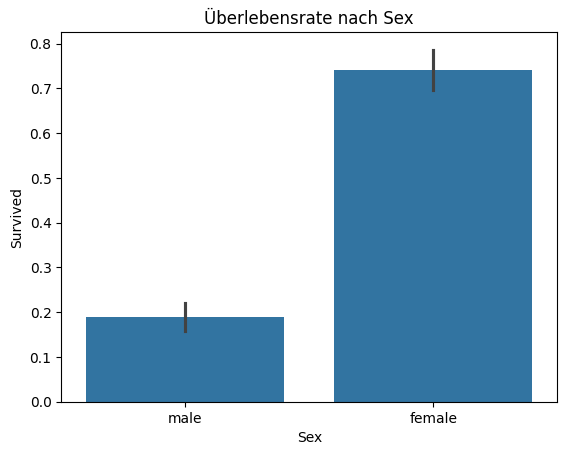


📊 Überlebensrate nach SibSp:
SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64


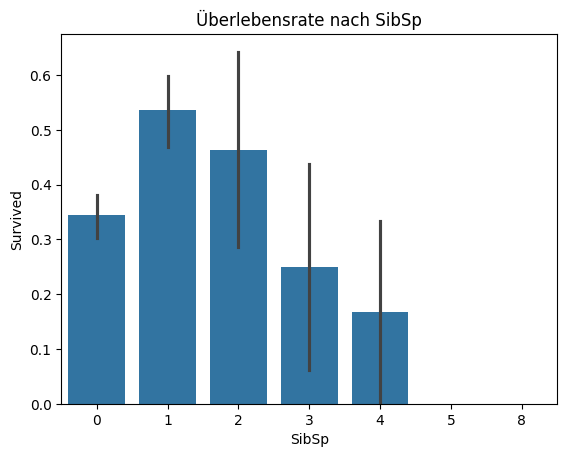


📊 Überlebensrate nach Parch:
Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


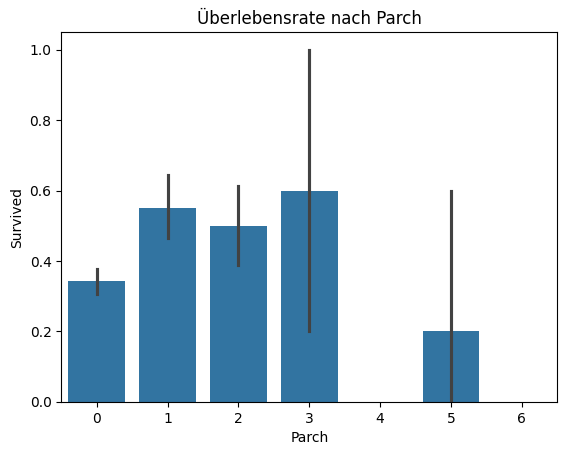


📊 Überlebensrate nach Embarked:
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


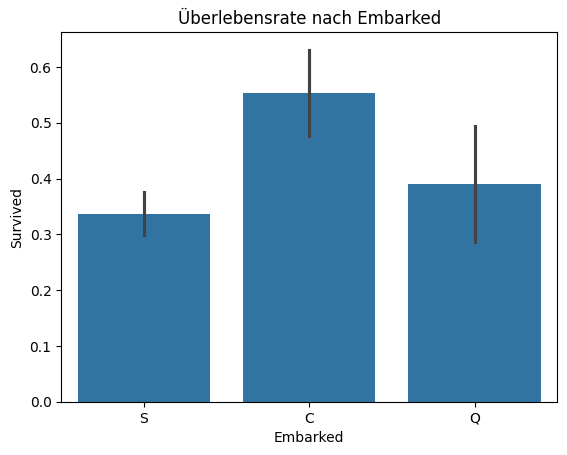


🧒 Altersverteilung (binned) und Überlebensrate:
AgeBin
Kind      0.579710
Teen      0.428571
Jung      0.355556
Mittel    0.425743
Reif      0.407407
Alt       0.227273
Name: Survived, dtype: float64


C:\Users\timgr_\AppData\Local\Temp\ipykernel_26092\254727877.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("AgeBin")["Survived"].mean())


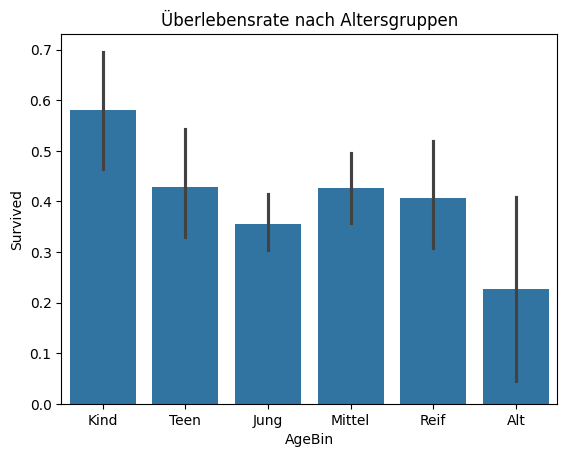


💰 Fare-Verteilung (binned) und Überlebensrate:
FareBin
Niedrig      0.197309
Mittel       0.303571
Hoch         0.454955
Sehr hoch    0.581081
Name: Survived, dtype: float64


C:\Users\timgr_\AppData\Local\Temp\ipykernel_26092\254727877.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("FareBin")["Survived"].mean())


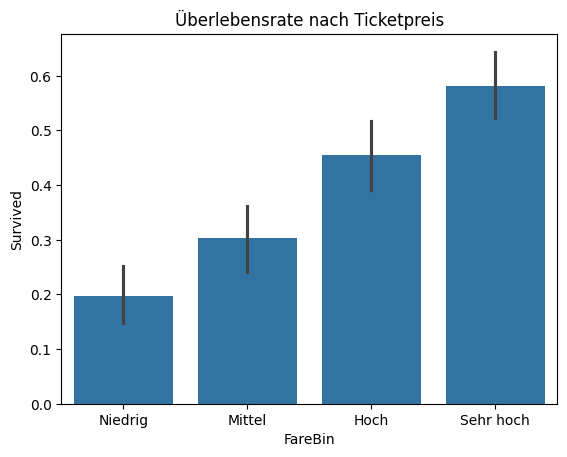

In [ ]:
# 📦 Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# 📥 CSV laden
df = pd.read_csv("../data/train.csv")  # relativer Pfad von notebooks/ aus

# 🧐 Überblick
print("🔍 Überblick:")
print(df.shape)
print(df.info())
print(df.describe())

# 📌 Titel extrahieren aus Name
df["Title"] = df["Name"].str.extract(" ([A-Za-z]+)\.", expand=False)
df["Title"] = df["Title"].replace(
    ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],
    'Rare'
)
df["Title"] = df["Title"].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})
df["Title"] = LabelEncoder().fit_transform(df["Title"])

# 👨‍👩‍👧‍👦 Familien-Features
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df["IsAlone"] = (df["FamilySize"] == 1).astype(int)  # 1 = allein, 0 = nicht allein

# 📊 Überlebensrate nach diskreten Features
features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
for feature in features:
    print(f"\n📊 Überlebensrate nach {feature}:")
    print(df.groupby(feature)["Survived"].mean())
    sns.barplot(x=feature, y="Survived", data=df)
    plt.title(f"Überlebensrate nach {feature}")
    plt.show()

# 🧒 Altersverteilung und Binning
print("\n🧒 Altersverteilung (binned) und Überlebensrate:")
df["AgeBin"] = pd.cut(df["Age"], bins=[0, 12, 18, 30, 45, 60, 80], labels=["Kind", "Teen", "Jung", "Mittel", "Reif", "Alt"])
print(df.groupby("AgeBin")["Survived"].mean())
sns.barplot(x="AgeBin", y="Survived", data=df)
plt.title("Überlebensrate nach Altersgruppen")
plt.show()

# 💰 Fare-Verteilung und Binning
print("\n💰 Fare-Verteilung (binned) und Überlebensrate:")
df["FareBin"] = pd.qcut(df["Fare"], 4, labels=["Niedrig", "Mittel", "Hoch", "Sehr hoch"])
print(df.groupby("FareBin")["Survived"].mean())
sns.barplot(x="FareBin", y="Survived", data=df)
plt.title("Überlebensrate nach Ticketpreis")
plt.show()

# 📈 Korrelationsanalyse numerischer Features mit Survived
print("\n📈 Korrelationsmatrix mit 'Survived':")

numerical_features = ["Survived", "Pclass", "SibSp", "Parch", "Age", "Fare",
                      "FamilySize", "IsAlone", "Title"]

# Korrelationen berechnen und ausgeben
corr_matrix = df[numerical_features].corr()
print(corr_matrix["Survived"].sort_values(ascending=False))

# Heatmap anzeigen
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("📊 Korrelationsmatrix (inkl. neuer Features)")
plt.show()

